In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
import plotly
from sklearn.neighbors import KNeighborsClassifier
import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
import math
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import os
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model
import warnings
warnings.filterwarnings('ignore')
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
import os
from sklearn.metrics import classification_report
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import average_precision_score, matthews_corrcoef
import warnings
from imblearn.over_sampling import SMOTE, ADASYN
warnings.filterwarnings('ignore')
import matplotlib
import sklearn
from IPython.display import HTML
#from IPython.display import YouTubeVideo
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
import pickle
import os
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

# Import Data

Using the full dataset that is not split into train/val/test

In [2]:
print(os.getcwd())
relative_path = os.path.abspath(os.path.join(os.getcwd(), "../../"))
data = pd.read_csv(relative_path+'/preprocessed_data/non_split_dataset/total_subset.csv')
data = data.drop(['evil','userId'],axis=1)
print(data.shape)

a:\Desktop\FYP Final Files\notebooks\Supervised_ML
(1141078, 7)


In [3]:
data.head(1)

,processId,parentProcessId,mountNamespace,eventId,argsNum,returnValue,sus
0,1,0,1,157,5,0,1


Dropping target feature

In [4]:
X = data.drop(['sus'],axis=1)
y = data['sus']

Quick look at the data

In [5]:
X.head(5)

,processId,parentProcessId,mountNamespace,eventId,argsNum,returnValue
0,1,0,1,157,5,0
1,1,0,1,3,1,0
2,1,0,1,1010,0,0
3,1,1,0,21,2,2
4,1,1,0,1005,4,0


In [6]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: sus, dtype: int64

# Helper function that will assist in printing the metrics

In [7]:
def print_metrics(y_true, y_predicted):

    accuracy = accuracy_score(y_true, y_predicted)   
    metrics_results = precision_recall_fscore_support(y_true, y_predicted, average="weighted", pos_label=1)
    average_precision = average_precision_score(y_true, y_predicted)
    balanced_accuracy = balanced_accuracy_score(y_true, y_predicted)
    mcc = matthews_corrcoef(y_true, y_predicted)
    
    print(f'Accuracy:\t{accuracy:.3f}')
    print(f'Precision:\t{metrics_results[0]}')
    print(f'Recall:\t\t{metrics_results[1]:.3f}')
    print(f'F1-Score:\t{metrics_results[2]:.3f}')
    print("Average Precision Score:", average_precision)
    print("Balanced Accuracy Score:", balanced_accuracy)
    print("Matthews Correlation Coefficient (MCC):", mcc)
    print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_true , y_predicted)))
    
    # make confusion matrix
    confusion_matrixs = confusion_matrix(y_true, y_predicted)
    

    TP = confusion_matrixs[1][1]
    TN = confusion_matrixs[0][0]
    FP = confusion_matrixs[0][1]
    FN = confusion_matrixs[1][0]


    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrixs, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    print("True Positives (TP):", TP)
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)

    # Print roc curve
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_predicted)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, )
    display.plot()
    plt.show()


    precision, recall, _ = precision_recall_curve(y_true, y_predicted)

    # Calculate the area under the curve
    pr_auc = auc(recall, precision)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

# Split the dataset into training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=0)

# Lets get a baseline score

### Logistic Regression

Define and fit model to training data

In [9]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

Predict on test data

In [10]:
y_pred = logistic_regression.predict(X_test)

Lets print the metrics

Accuracy:	0.968
Precision:	0.9679346555406193
Recall:		0.968
F1-Score:	0.968
Average Precision Score: 0.8195947852031283
Balanced Accuracy Score: 0.9224068691555523
Matthews Correlation Coefficient (MCC): 0.8749461579322704
AUC : 0.92241


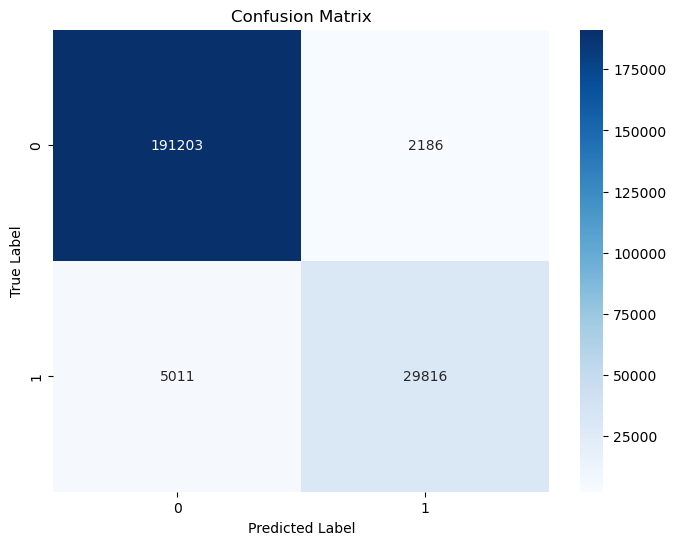

True Positives (TP): 29816
True Negatives (TN): 191203
False Positives (FP): 2186
False Negatives (FN): 5011


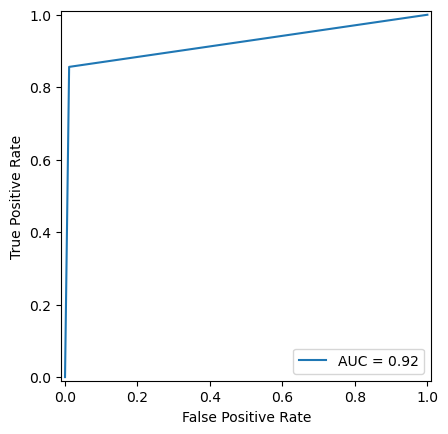

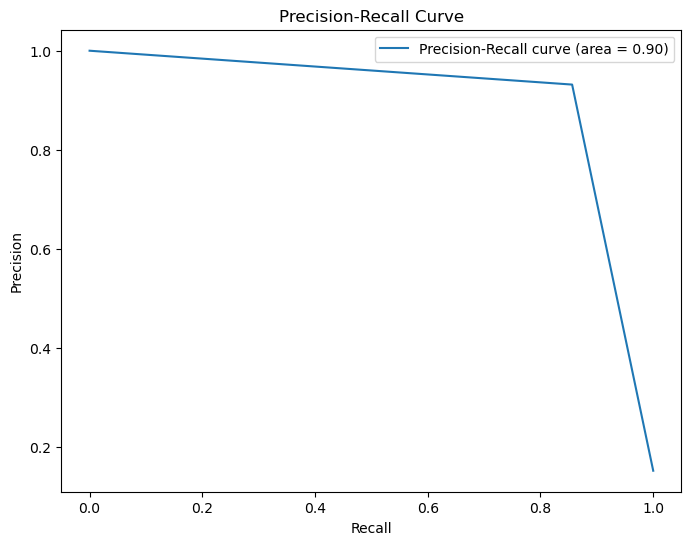

In [11]:
print_metrics(y_test,y_pred)

# Dealing with class imbalance
We are getting great scores but lets see if we can mess with the class imbalance and get an even better score

Splitting the data from the orignal set before any data manipulation

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

Lets see what our data looks like now

In [13]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 6)   X_train
(228216, 6)   X_test
(912862,)   y_train
(228216,)   y_test


## Under Sampling

In [14]:
underSampler = RandomUnderSampler(random_state=0)
X_under_sampled_train , y_under_sampled_train = underSampler.fit_resample(X_train,y_train)

Lets see what our data looks like now

In [15]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_under_sampled_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    138687
1    138687
Name: count, dtype: int64


Train a logistic regression model on our undersampled data

In [16]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_under_sampled_train,y_under_sampled_train)

LogisticRegression()

In [17]:
# cv_predictions = cross_val_predict(logistic_regression, X_under_sampled_train, y_under_sampled_train, cv=5)
# # Calculate evaluation metrics
# cv_accuracy = accuracy_score(y_under_sampled_train, cv_predictions)
# cv_precision = precision_score(y_under_sampled_train, cv_predictions)
# cv_recall = recall_score(y_under_sampled_train, cv_predictions)
# cv_f1_score = f1_score(y_under_sampled_train, cv_predictions)

In [18]:
# # Print the cross-validation scores
# print("Cross-Validation Metrics:")
# print("Accuracy:", cv_accuracy)
# print("Precision:", cv_precision)
# print("Recall:", cv_recall)
# print("F1 Score:", cv_f1_score)

And predict on untouched test data

In [19]:
y_pred = logistic_regression.predict(X_test)

Accuracy:	0.962
Precision:	0.9619678507548363
Recall:		0.962
F1-Score:	0.962
Average Precision Score: 0.7854972607344639
Balanced Accuracy Score: 0.9258455364566931
Matthews Correlation Coefficient (MCC): 0.852948017738329
AUC : 0.92585


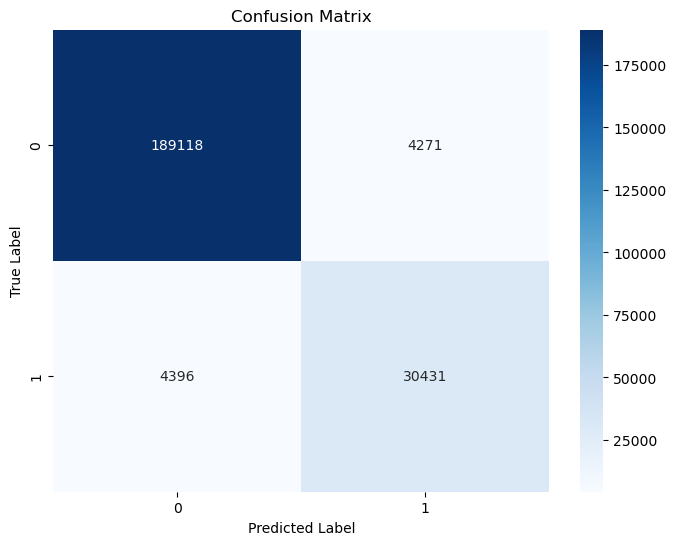

True Positives (TP): 30431
True Negatives (TN): 189118
False Positives (FP): 4271
False Negatives (FN): 4396


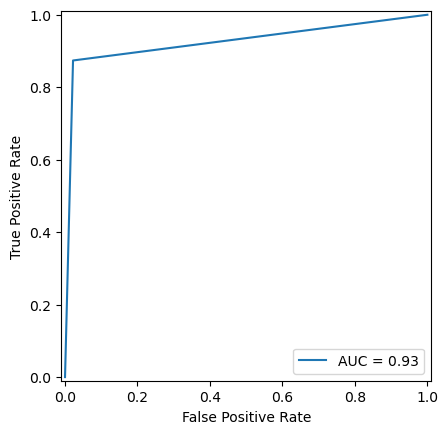

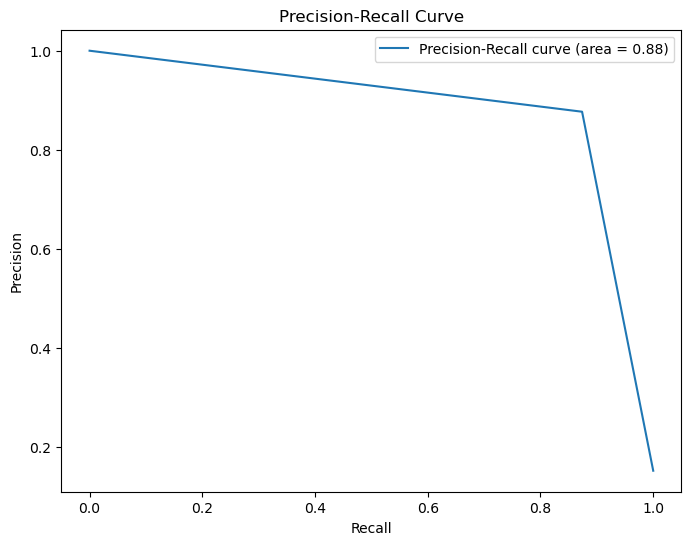

In [20]:
print_metrics(y_test,y_pred)

## Over Sampling

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [22]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 6)   X_train
(228216, 6)   X_test
(912862,)   y_train
(228216,)   y_test


In [23]:
overSampler = RandomOverSampler(random_state=0)
X_over_sampled_train , y_over_sampled_train = overSampler.fit_resample(X_train,y_train)

In [24]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_over_sampled_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    774175
1    774175
Name: count, dtype: int64


Train a logistic regression model on our over sampled data

In [25]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_over_sampled_train, y_over_sampled_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.962
Precision:	0.9619678507548363
Recall:		0.962
F1-Score:	0.962
Average Precision Score: 0.7854972607344639
Balanced Accuracy Score: 0.9258455364566931
Matthews Correlation Coefficient (MCC): 0.852948017738329
AUC : 0.92585


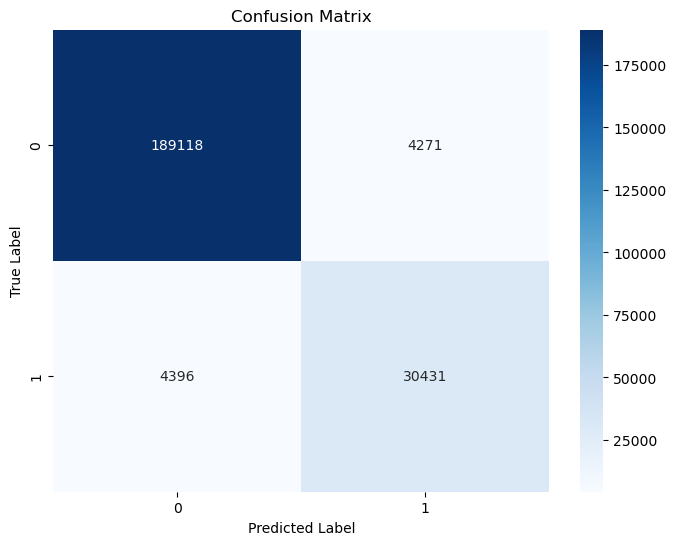

True Positives (TP): 30431
True Negatives (TN): 189118
False Positives (FP): 4271
False Negatives (FN): 4396


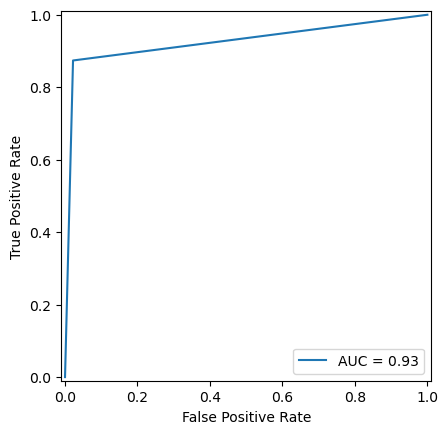

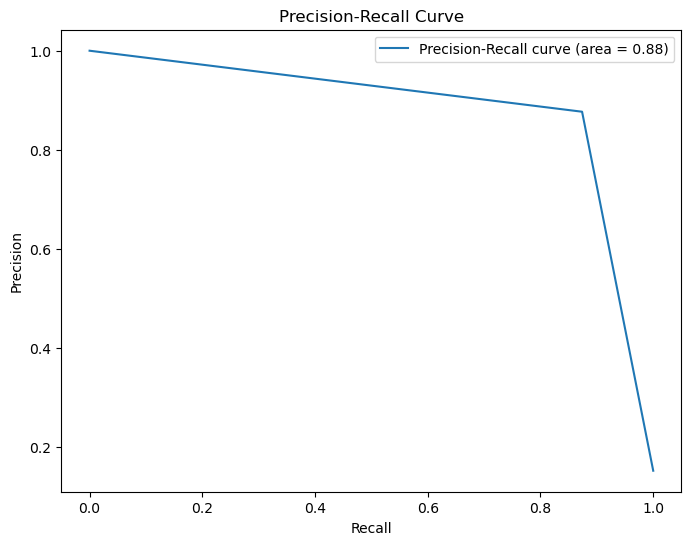

In [26]:
print_metrics(y_test,y_pred)

## Smote

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [28]:
print(X_train.shape , "  X_train")
print(X_test.shape , "  X_test")
print(y_train.shape , "  y_train")
print(y_test.shape , "  y_test")

(912862, 6)   X_train
(228216, 6)   X_test
(912862,)   y_train
(228216,)   y_test


In [29]:
smote_OS = SMOTE(random_state=0)
X_smote_train , y_smote_train = smote_OS.fit_resample(X_train,y_train)

In [30]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_smote_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    774175
1    774175
Name: count, dtype: int64


Train a logistic regression model on SMOTE modified data

In [31]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_smote_train, y_smote_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.955
Precision:	0.9559586581527567
Recall:		0.955
F1-Score:	0.955
Average Precision Score: 0.7517926774088585
Balanced Accuracy Score: 0.9222726587323298
Matthews Correlation Coefficient (MCC): 0.8294297387512928
AUC : 0.92227


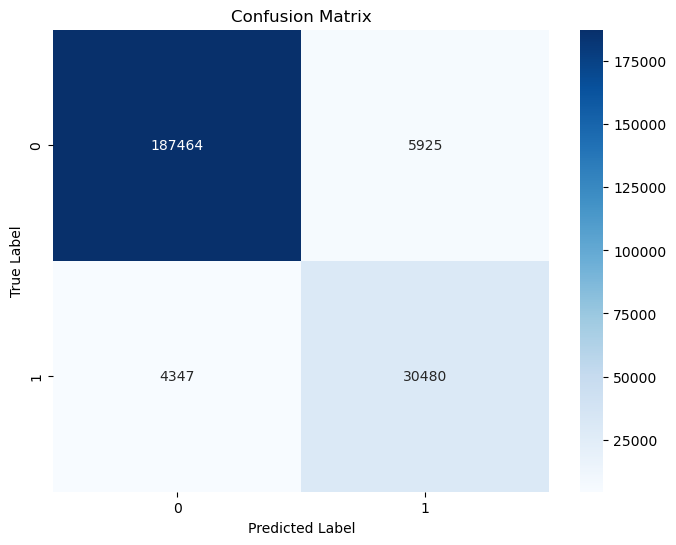

True Positives (TP): 30480
True Negatives (TN): 187464
False Positives (FP): 5925
False Negatives (FN): 4347


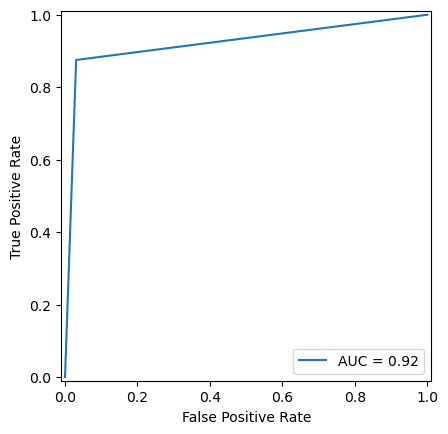

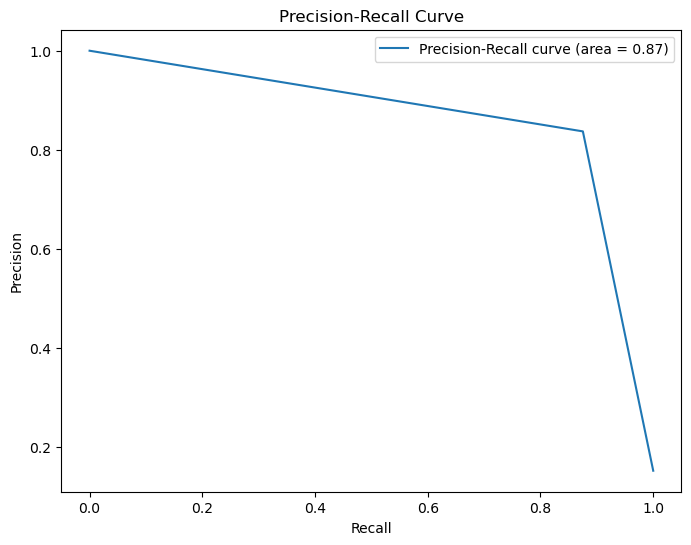

In [32]:
print_metrics(y_test,y_pred)

## Adasyn

In [33]:
adasyn = ADASYN(random_state=0)
X_adasyn_train , y_adasyn_train = adasyn.fit_resample(X_train,y_train)

In [34]:
print("------------Before under sampling------------")
print(y_test.value_counts())
print("------------After under sampling------------")
print(y_adasyn_train.value_counts())



------------Before under sampling------------
sus
0    193389
1     34827
Name: count, dtype: int64
------------After under sampling------------
sus
0    774175
1    770208
Name: count, dtype: int64


Train a logistic regression model on adasyn modified data

In [35]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_adasyn_train, y_adasyn_train)

y_pred = logistic_regression.predict(X_test)

Accuracy:	0.610
Precision:	0.8828498086316509
Recall:		0.610
F1-Score:	0.661
Average Precision Score: 0.2748060262972961
Balanced Accuracy Score: 0.7594213484860775
Matthews Correlation Coefficient (MCC): 0.3740935257317556
AUC : 0.75942


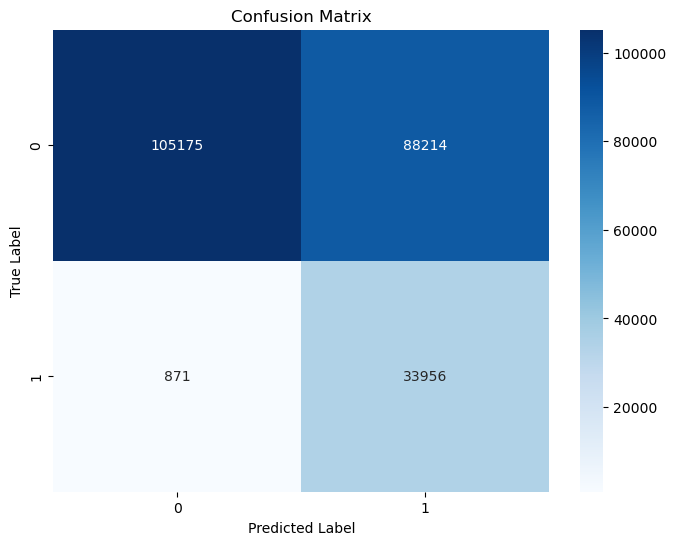

True Positives (TP): 33956
True Negatives (TN): 105175
False Positives (FP): 88214
False Negatives (FN): 871


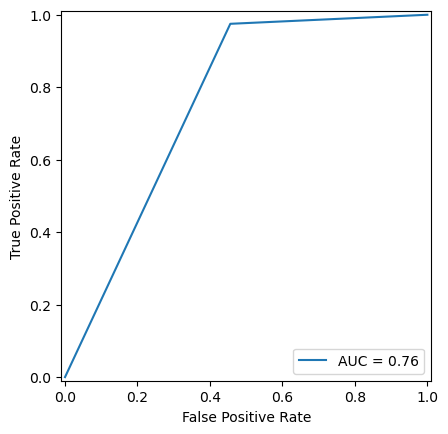

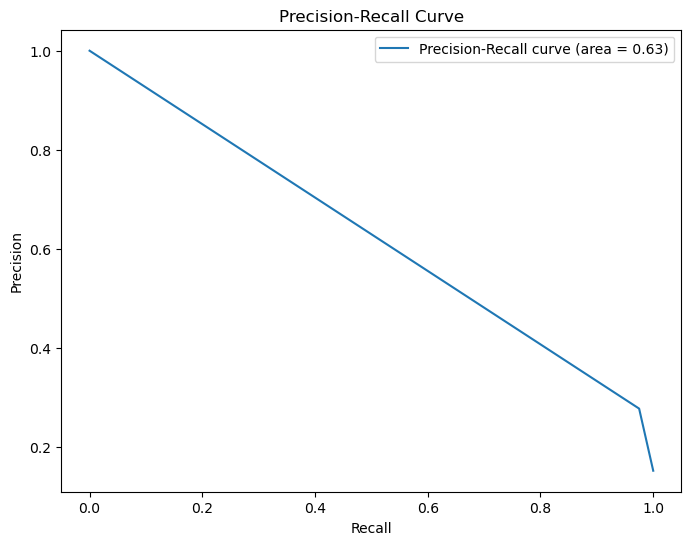

In [36]:
print_metrics(y_test,y_pred)

# Now that we have a baseline setup, lets try different models with the above data

- X_train, X_test - Original Data
- X_under_sampled_train , y_under_sampled_train - Under Sampled Data
- X_over_sampled_train , y_over_sampled_train - Over Sampled Data
- X_smote_train , y_smote_train - SMOTE modified Data
- X_adasyn_train , y_adasyn_train - ADASYN modified Data

## Decision Tree

In [37]:
# Declare Model
decision_tree = DecisionTreeClassifier(random_state=0)

### Original Data

Accuracy:	0.975
Precision:	0.9756225682820779
Recall:		0.975
F1-Score:	0.975
Average Precision Score: 0.8615362971700474
Balanced Accuracy Score: 0.9242306705003562
Matthews Correlation Coefficient (MCC): 0.9024015264064328
AUC : 0.92423


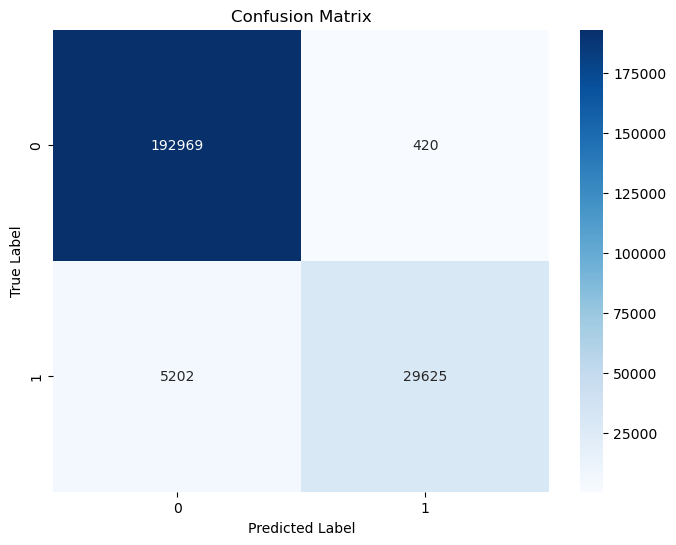

True Positives (TP): 29625
True Negatives (TN): 192969
False Positives (FP): 420
False Negatives (FN): 5202


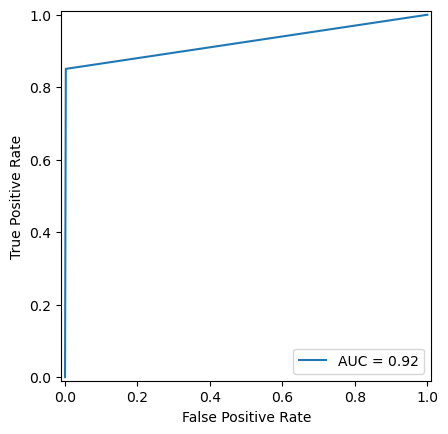

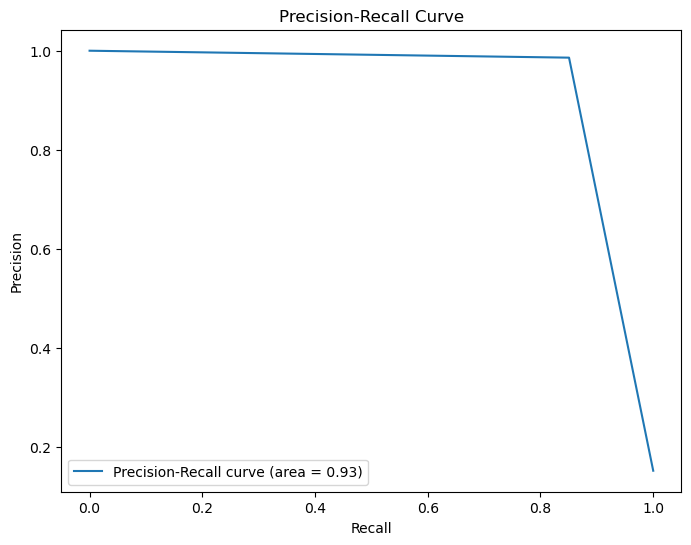

In [38]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.972
Precision:	0.9718443600079967
Recall:		0.972
F1-Score:	0.972
Average Precision Score: 0.8407890408187343
Balanced Accuracy Score: 0.9312300035641787
Matthews Correlation Coefficient (MCC): 0.8902398713518594
AUC : 0.93123


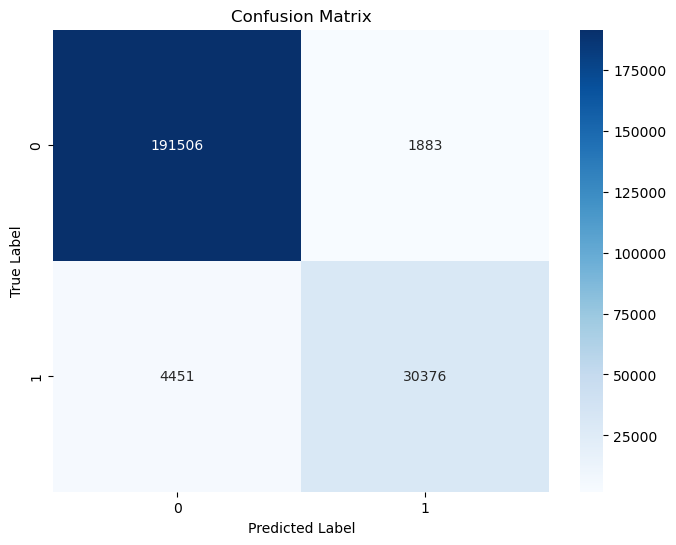

True Positives (TP): 30376
True Negatives (TN): 191506
False Positives (FP): 1883
False Negatives (FN): 4451


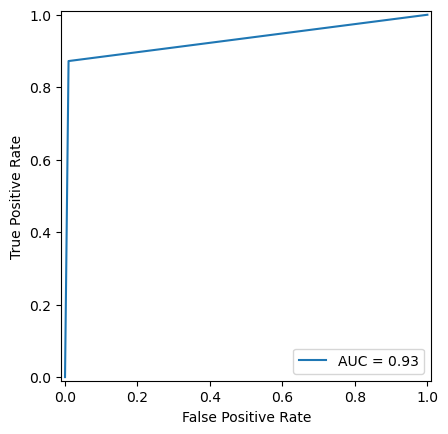

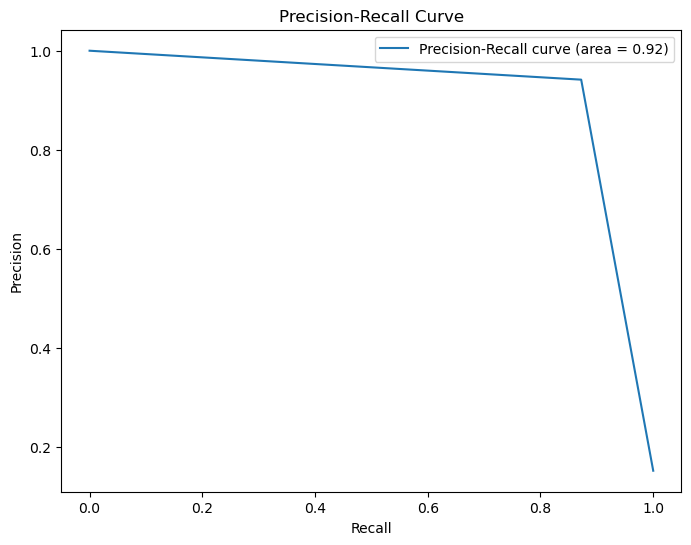

In [39]:
decision_tree.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.973
Precision:	0.9724709247665817
Recall:		0.973
F1-Score:	0.972
Average Precision Score: 0.8443244194644709
Balanced Accuracy Score: 0.9311107778658085
Matthews Correlation Coefficient (MCC): 0.8924966429206407
AUC : 0.93111


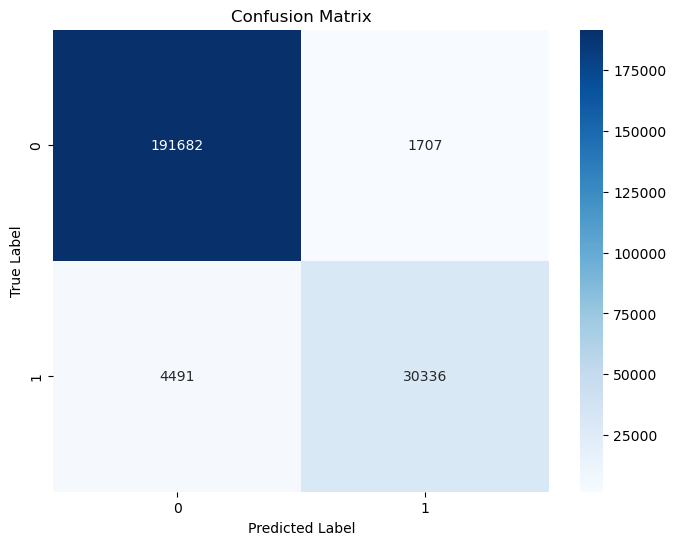

True Positives (TP): 30336
True Negatives (TN): 191682
False Positives (FP): 1707
False Negatives (FN): 4491


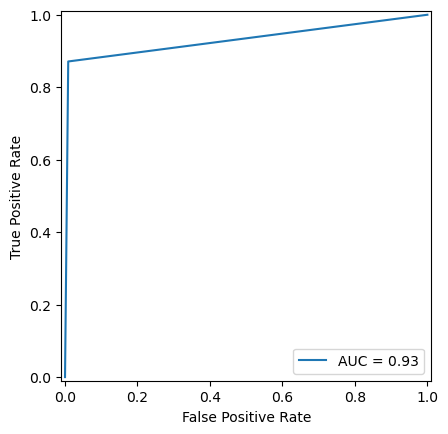

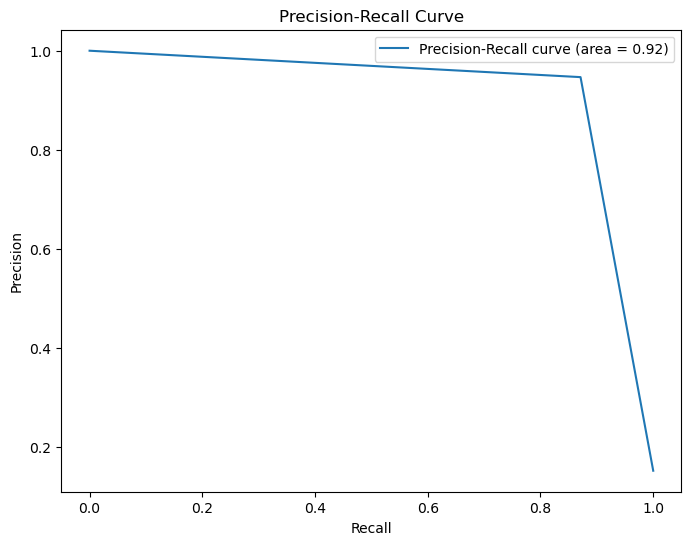

In [40]:
decision_tree.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.973
Precision:	0.9724665840701324
Recall:		0.973
F1-Score:	0.972
Average Precision Score: 0.844301655583711
Balanced Accuracy Score: 0.931084649973689
Matthews Correlation Coefficient (MCC): 0.8924775081898434
AUC : 0.93108


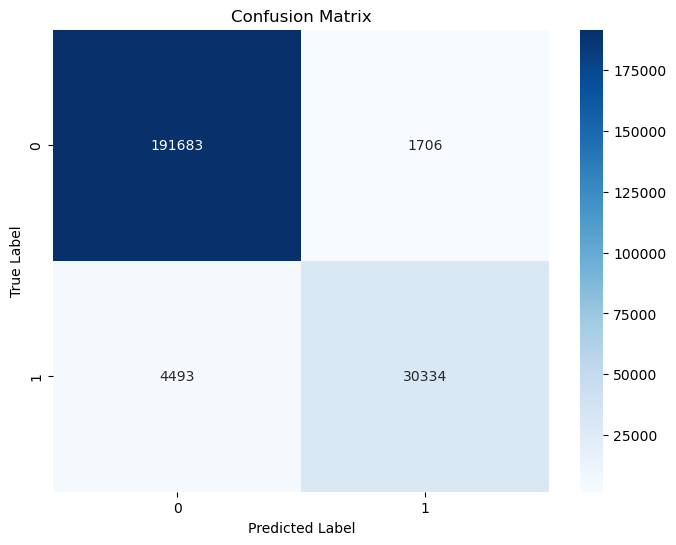

True Positives (TP): 30334
True Negatives (TN): 191683
False Positives (FP): 1706
False Negatives (FN): 4493


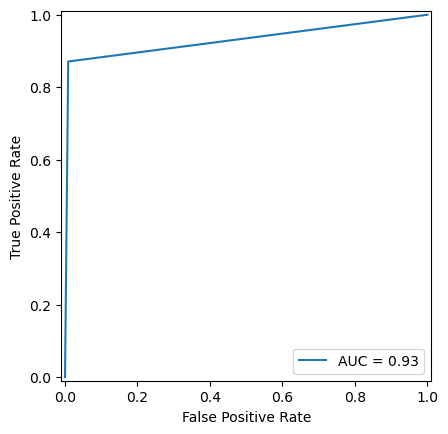

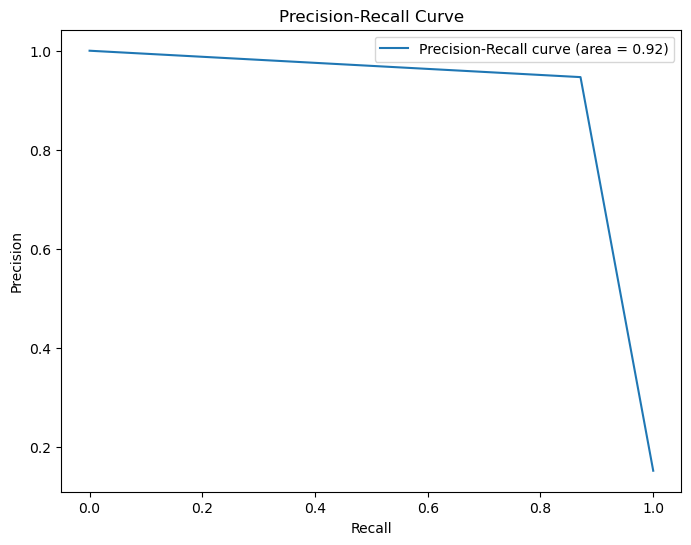

In [41]:
decision_tree.fit(X_smote_train, y_smote_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.733
Precision:	0.8943134902116816
Recall:		0.733
F1-Score:	0.770
Average Precision Score: 0.35216530615622493
Balanced Accuracy Score: 0.8273373470053479
Matthews Correlation Coefficient (MCC): 0.4788905381675408
AUC : 0.82734


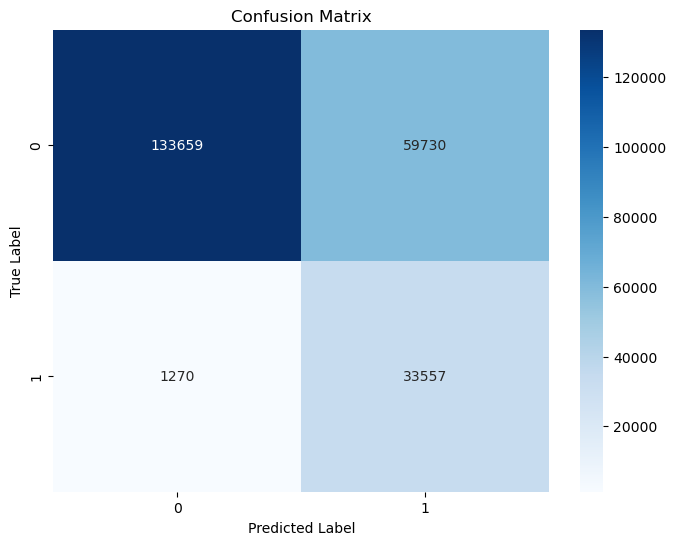

True Positives (TP): 33557
True Negatives (TN): 133659
False Positives (FP): 59730
False Negatives (FN): 1270


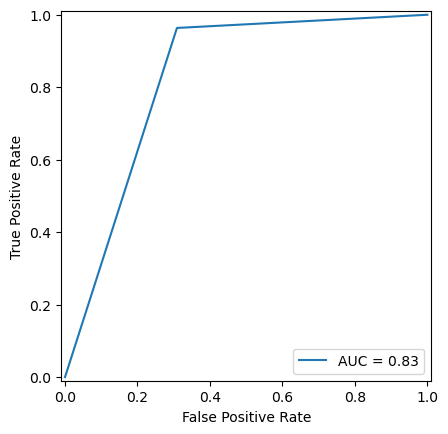

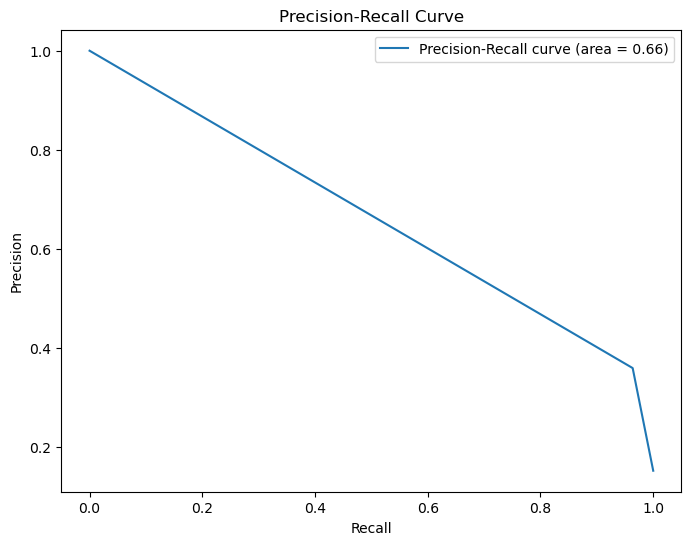

In [42]:
decision_tree.fit(X_adasyn_train, y_adasyn_train)
y_pred = decision_tree.predict(X_test)
print_metrics(y_test,y_pred)

## Random Forest

In [43]:
# Declare Random Forest Model
randomforest = RandomForestClassifier(random_state=0)

### Original Data

Accuracy:	0.975
Precision:	0.9756140986906378
Recall:		0.975
F1-Score:	0.975
Average Precision Score: 0.8614876453110166
Balanced Accuracy Score: 0.9242019571457751
Matthews Correlation Coefficient (MCC): 0.9023659298499569
AUC : 0.92420


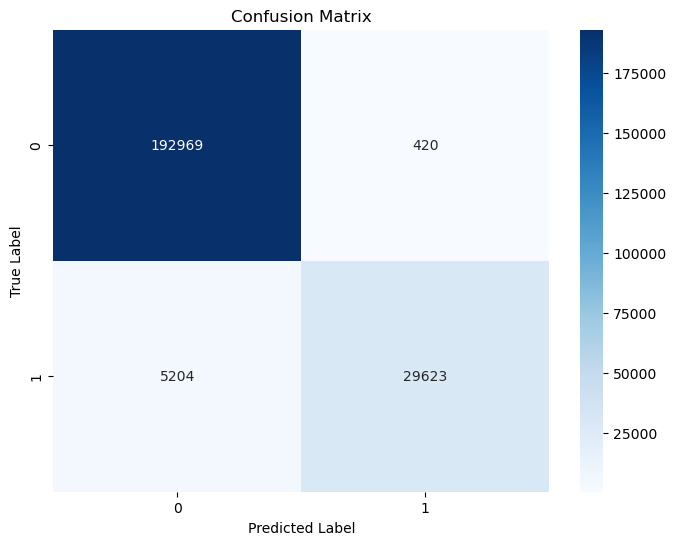

True Positives (TP): 29623
True Negatives (TN): 192969
False Positives (FP): 420
False Negatives (FN): 5204


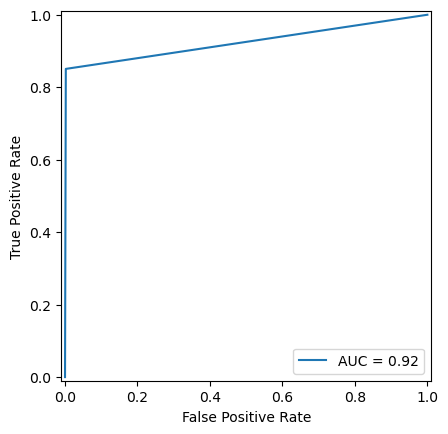

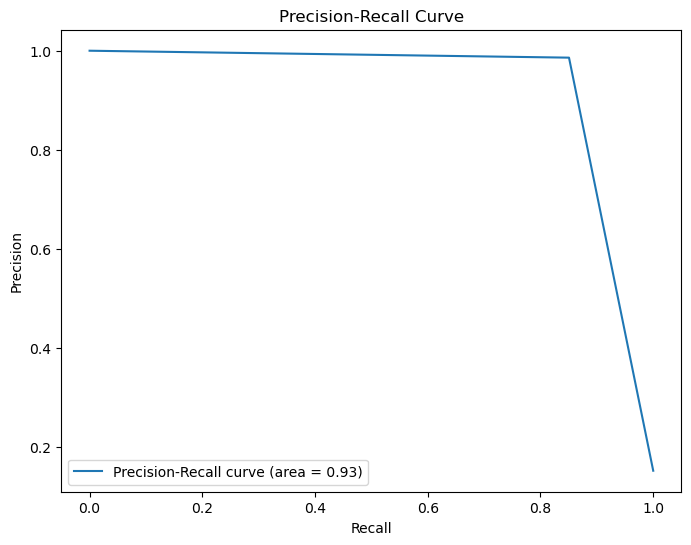

In [44]:
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.972
Precision:	0.9717214600189423
Recall:		0.972
F1-Score:	0.972
Average Precision Score: 0.8400998513338152
Balanced Accuracy Score: 0.9311837385073716
Matthews Correlation Coefficient (MCC): 0.8897873509499028
AUC : 0.93118


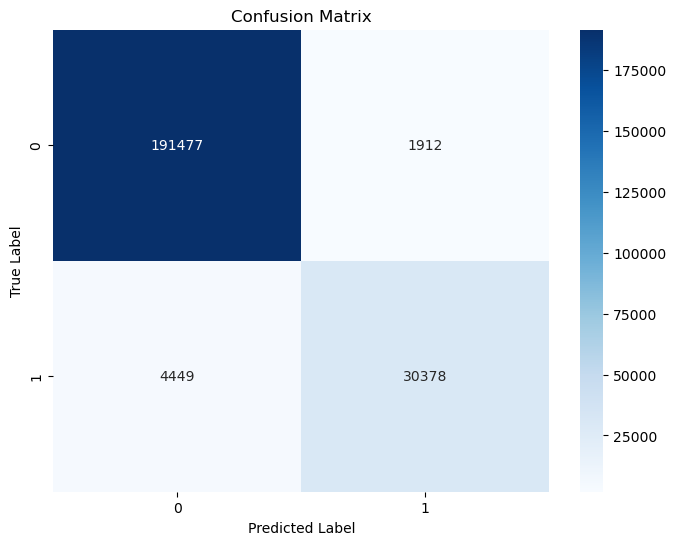

True Positives (TP): 30378
True Negatives (TN): 191477
False Positives (FP): 1912
False Negatives (FN): 4449


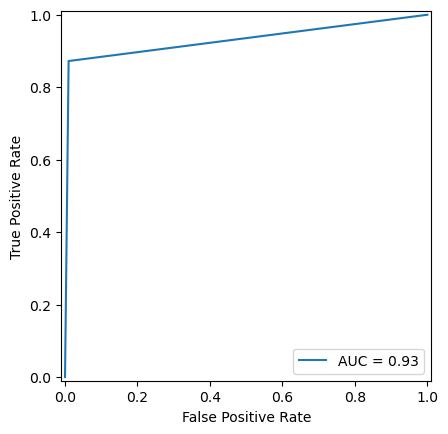

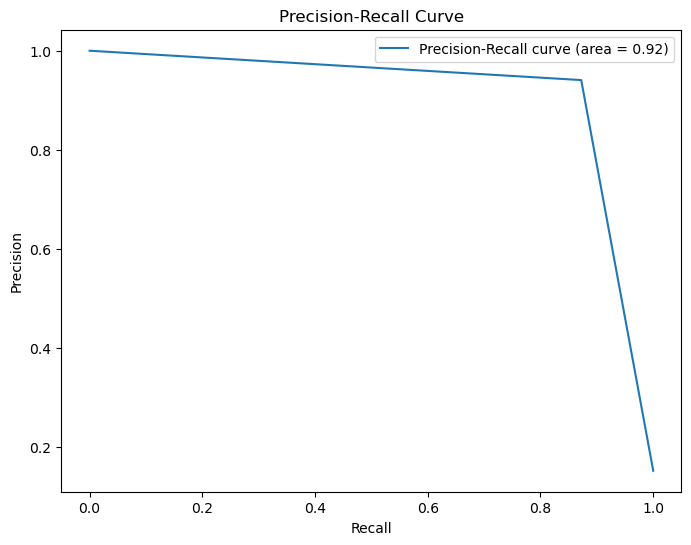

In [45]:
randomforest.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.973
Precision:	0.9724619759225709
Recall:		0.973
F1-Score:	0.972
Average Precision Score: 0.8442759193655361
Balanced Accuracy Score: 0.9310820645112273
Matthews Correlation Coefficient (MCC): 0.892460502992406
AUC : 0.93108


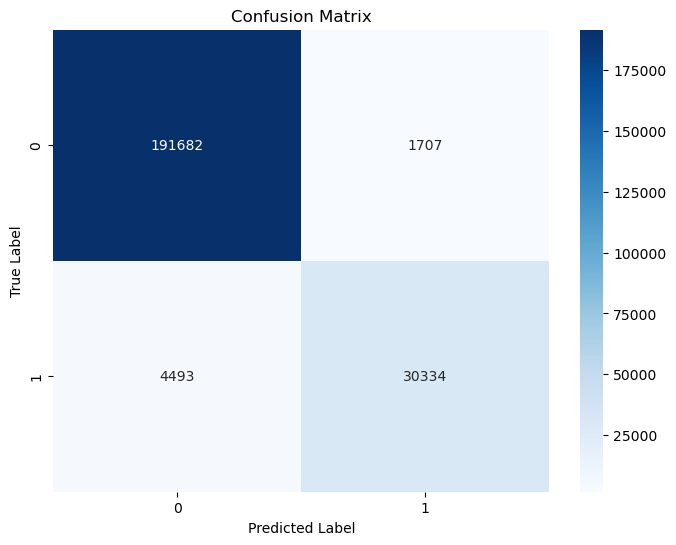

True Positives (TP): 30334
True Negatives (TN): 191682
False Positives (FP): 1707
False Negatives (FN): 4493


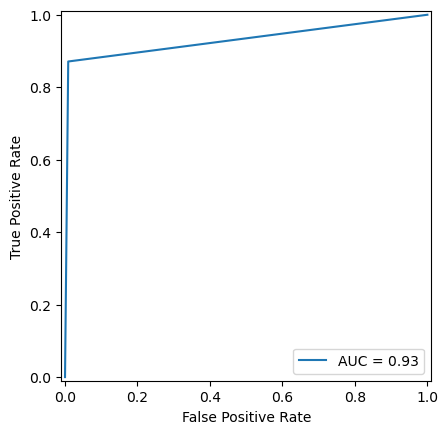

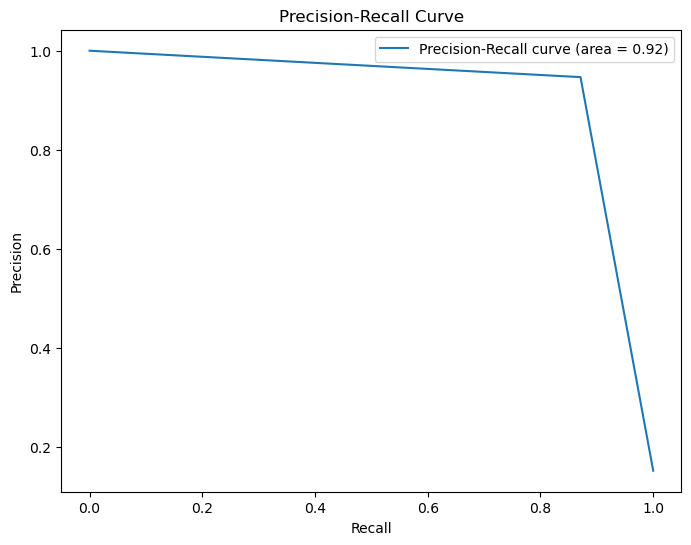

In [46]:
randomforest.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.973
Precision:	0.9724576356425557
Recall:		0.973
F1-Score:	0.972
Average Precision Score: 0.8442531553243617
Balanced Accuracy Score: 0.9310559366191078
Matthews Correlation Coefficient (MCC): 0.8924413681111252
AUC : 0.93106


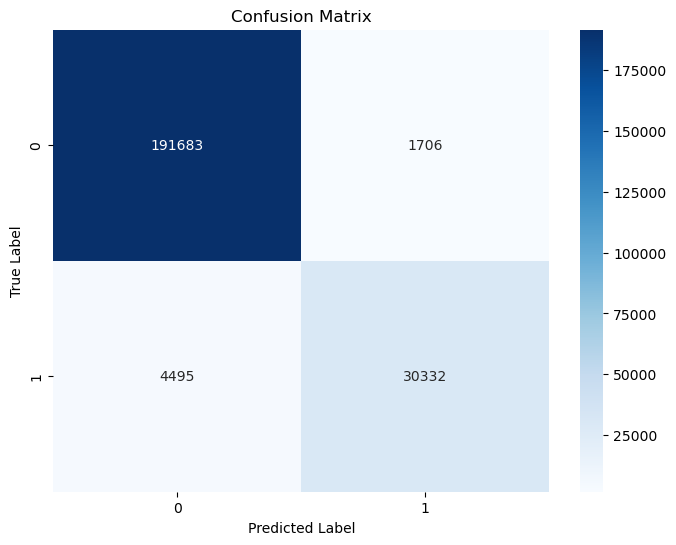

True Positives (TP): 30332
True Negatives (TN): 191683
False Positives (FP): 1706
False Negatives (FN): 4495


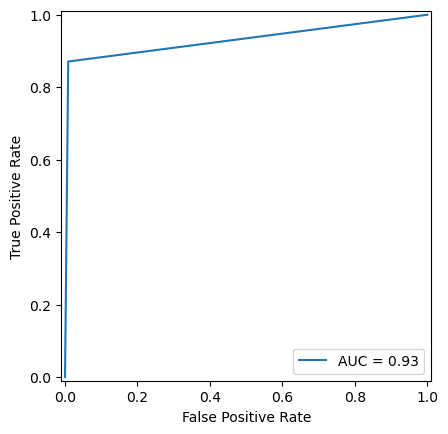

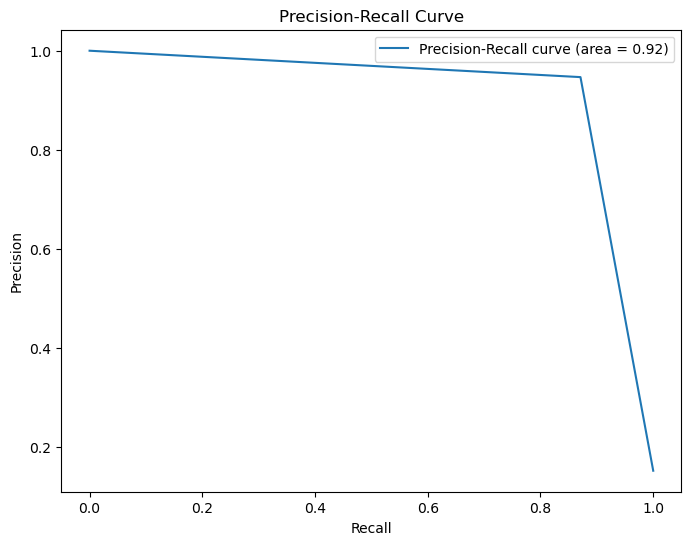

In [47]:
randomforest.fit(X_smote_train, y_smote_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.733
Precision:	0.8943134902116816
Recall:		0.733
F1-Score:	0.770
Average Precision Score: 0.35216530615622493
Balanced Accuracy Score: 0.8273373470053479
Matthews Correlation Coefficient (MCC): 0.4788905381675408
AUC : 0.82734


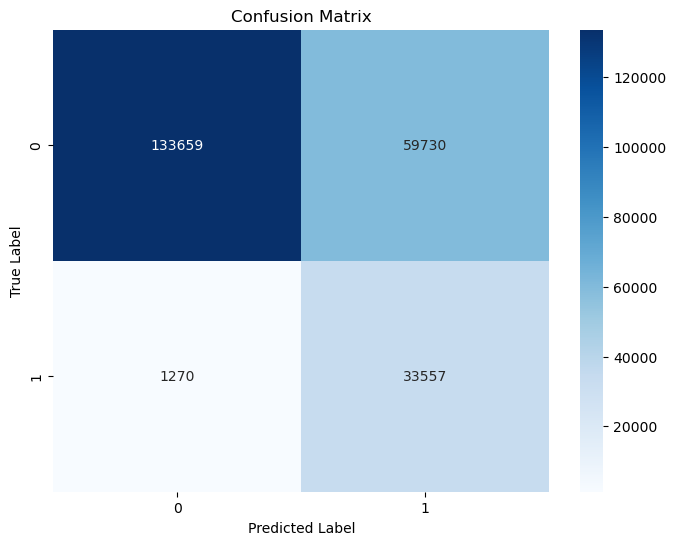

True Positives (TP): 33557
True Negatives (TN): 133659
False Positives (FP): 59730
False Negatives (FN): 1270


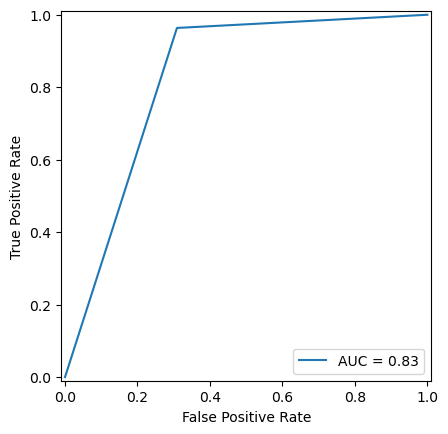

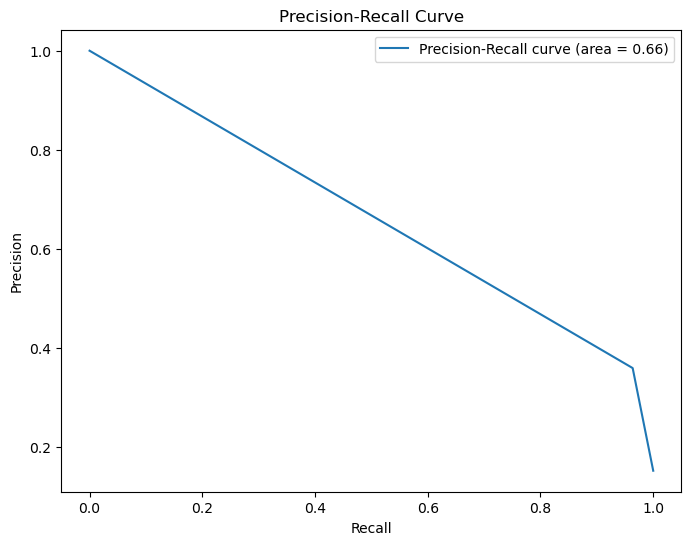

In [48]:
randomforest.fit(X_adasyn_train, y_adasyn_train)
y_pred = randomforest.predict(X_test)
print_metrics(y_test,y_pred)

## KNN

In [49]:
# Declare KNN Model
knn = KNeighborsClassifier()

### Original Data

Accuracy:	0.975
Precision:	0.975550337918021
Recall:		0.975
F1-Score:	0.975
Average Precision Score: 0.8611922630489075
Balanced Accuracy Score: 0.9247069632859399
Matthews Correlation Coefficient (MCC): 0.9022568267181149
AUC : 0.92471


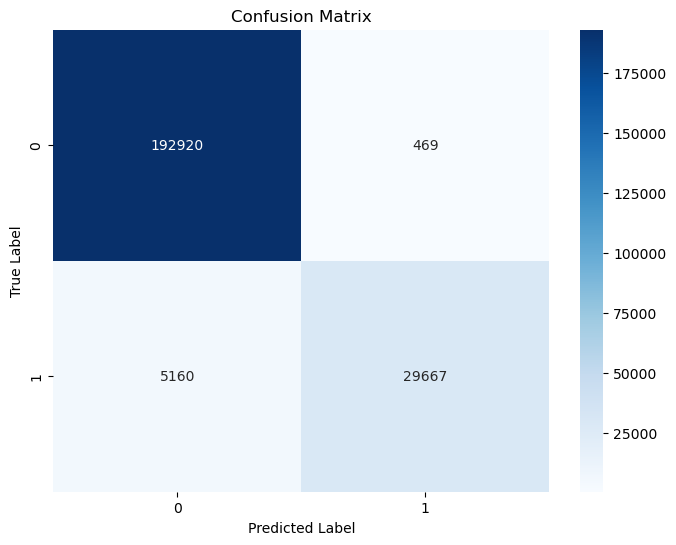

True Positives (TP): 29667
True Negatives (TN): 192920
False Positives (FP): 469
False Negatives (FN): 5160


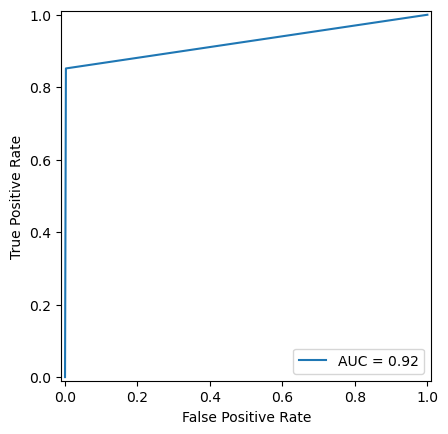

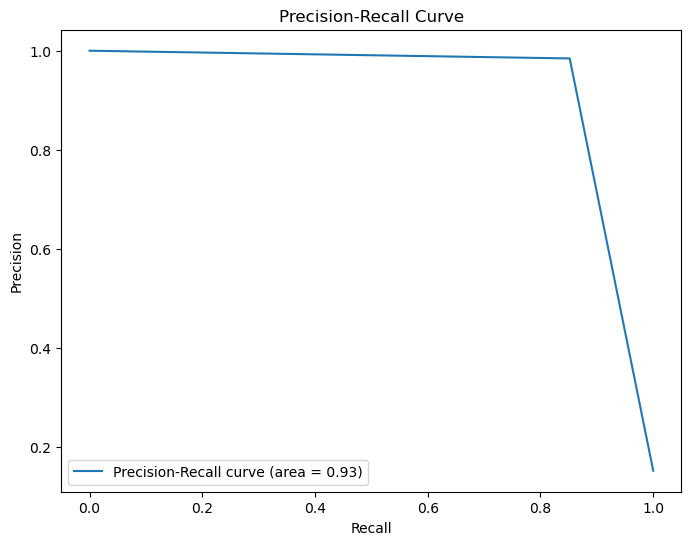

In [50]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### UnderSampled Data

Accuracy:	0.848
Precision:	0.8462917892995789
Recall:		0.848
F1-Score:	0.779
Average Precision Score: 0.1552406196174633
Balanced Accuracy Score: 0.501856572732938
Matthews Correlation Coefficient (MCC): 0.05044697595523044
AUC : 0.50186


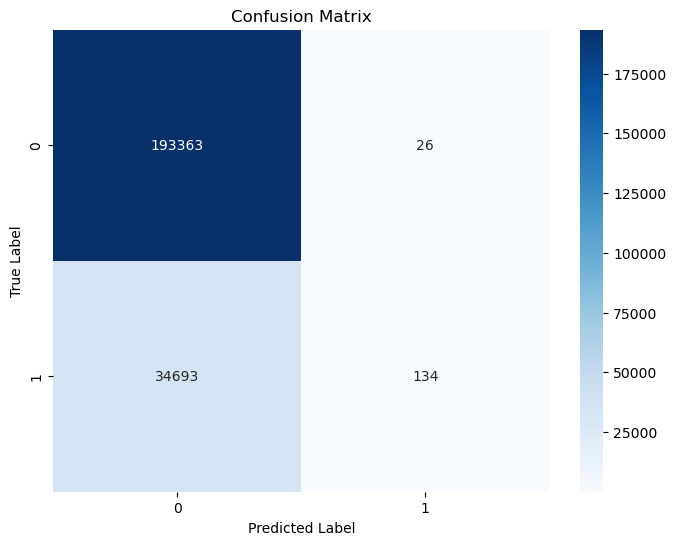

True Positives (TP): 134
True Negatives (TN): 193363
False Positives (FP): 26
False Negatives (FN): 34693


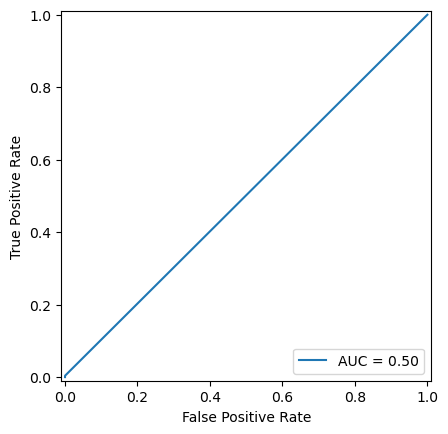

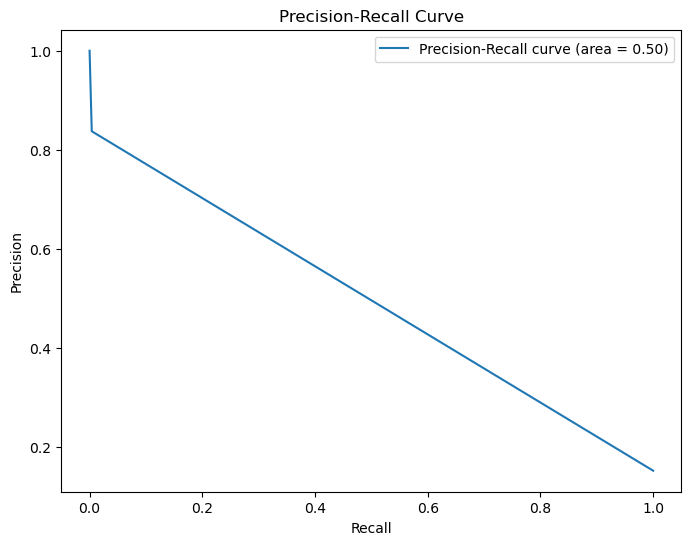

In [51]:
knn.fit(X_under_sampled_train, y_under_sampled_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### OverSampled Data

Accuracy:	0.974
Precision:	0.9739738240519865
Recall:		0.974
F1-Score:	0.974
Average Precision Score: 0.852765091307854
Balanced Accuracy Score: 0.9301896590364576
Matthews Correlation Coefficient (MCC): 0.8977589860276995
AUC : 0.93019


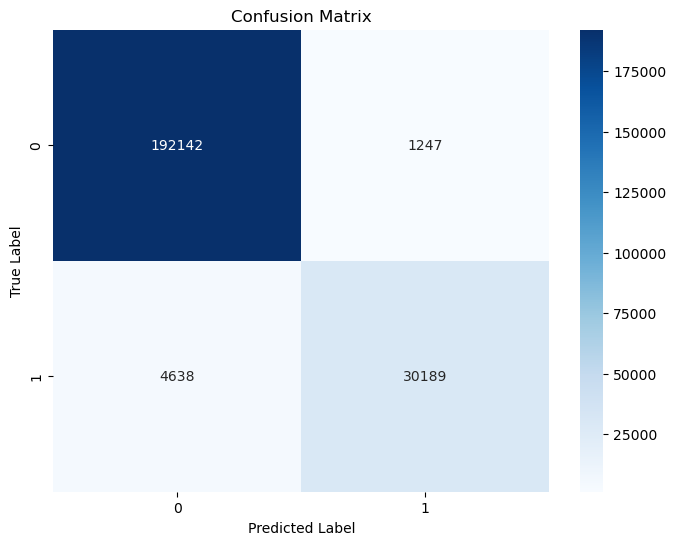

True Positives (TP): 30189
True Negatives (TN): 192142
False Positives (FP): 1247
False Negatives (FN): 4638


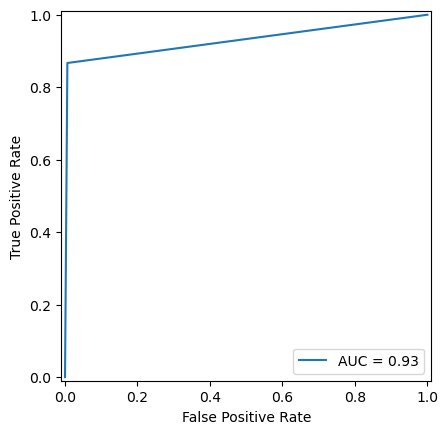

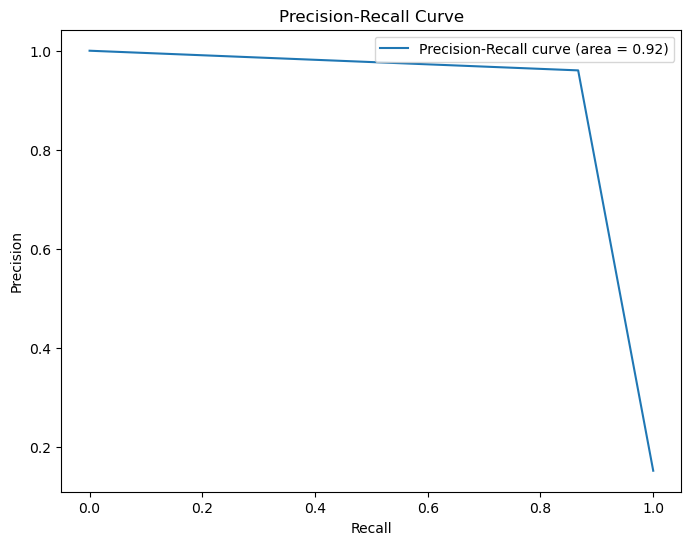

In [52]:
knn.fit(X_over_sampled_train, y_over_sampled_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### SMOTE Data

Accuracy:	0.974
Precision:	0.973898437785957
Recall:		0.974
F1-Score:	0.974
Average Precision Score: 0.8523248896590054
Balanced Accuracy Score: 0.9311408152426427
Matthews Correlation Coefficient (MCC): 0.8976372977728915
AUC : 0.93114


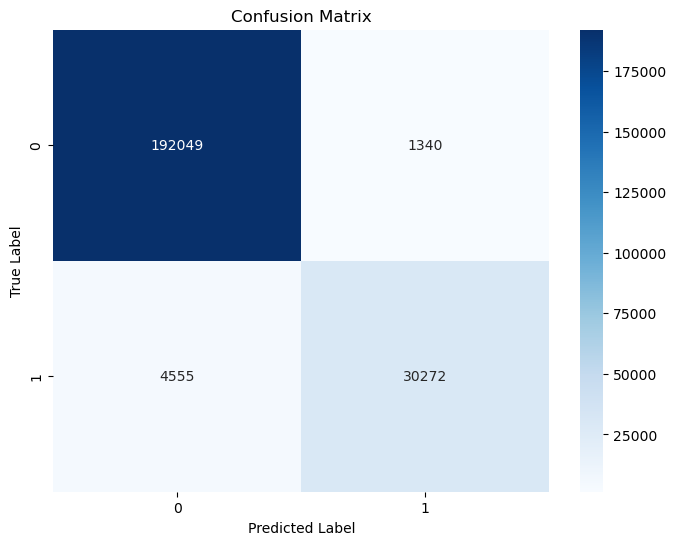

True Positives (TP): 30272
True Negatives (TN): 192049
False Positives (FP): 1340
False Negatives (FN): 4555


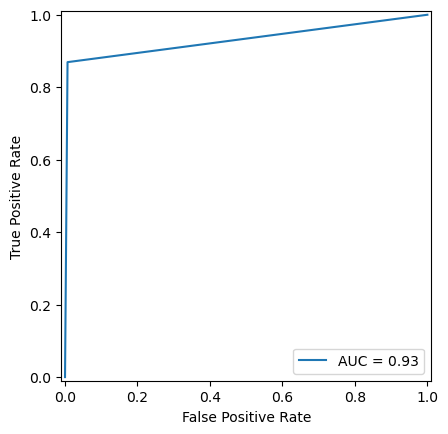

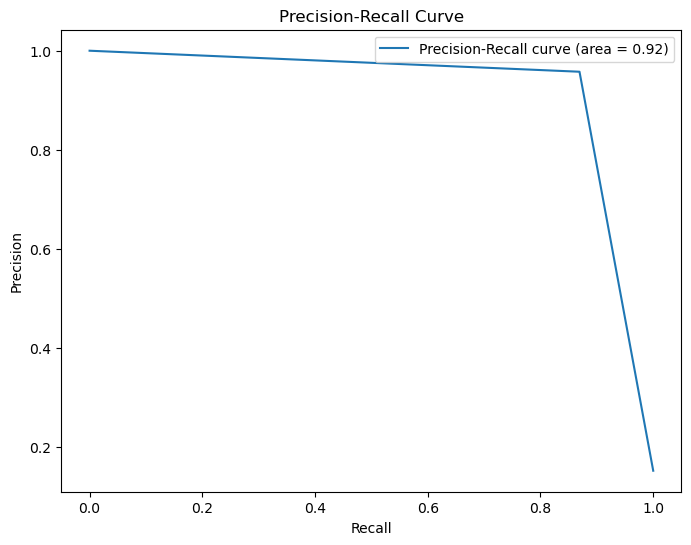

In [53]:
knn.fit(X_smote_train, y_smote_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)

### ADASYN Data

Accuracy:	0.970
Precision:	0.9691839402001916
Recall:		0.970
F1-Score:	0.969
Average Precision Score: 0.8264002504869792
Balanced Accuracy Score: 0.9240216694118781
Matthews Correlation Coefficient (MCC): 0.8796733355418225
AUC : 0.92402


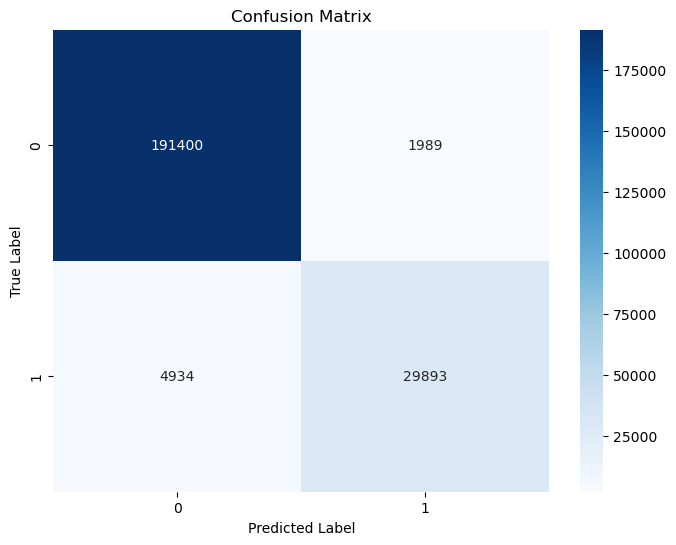

True Positives (TP): 29893
True Negatives (TN): 191400
False Positives (FP): 1989
False Negatives (FN): 4934


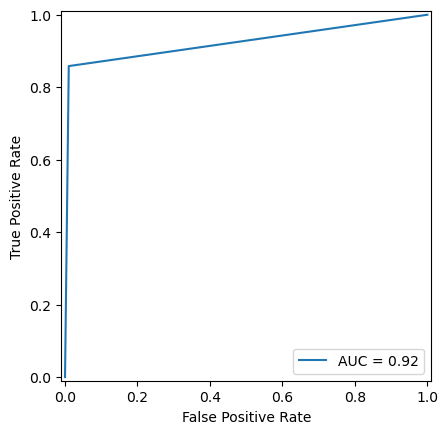

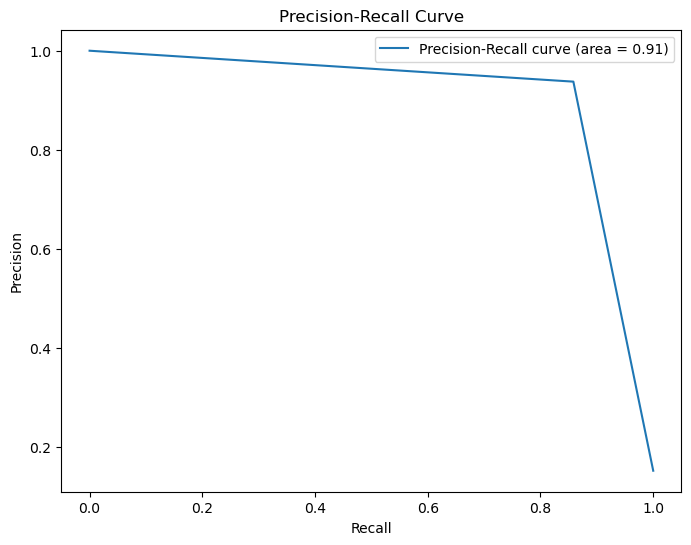

In [54]:
knn.fit(X_adasyn_train, y_adasyn_train)
y_pred = knn.predict(X_test)
print_metrics(y_test,y_pred)